In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [4]:
df=pd.read_csv('C:/Users/anuj/Documents/Anuj/MMA/Udemy/Python/Time Series/UDEMY_TSA_FINAL/Data/airline_passengers.csv',index_col='Month',parse_dates=True)

In [5]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
df.index.freq="MS"

In [9]:
df1=pd.read_csv('C:/Users/anuj/Documents/Anuj/MMA/Udemy/Python/Time Series/UDEMY_TSA_FINAL/Data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)

In [10]:
df1.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [11]:
df1.index.freq='D'

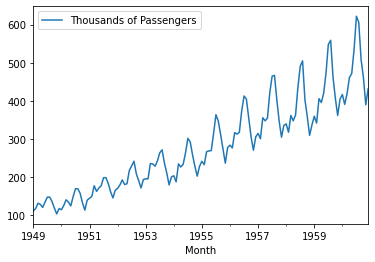

In [12]:
df.plot();

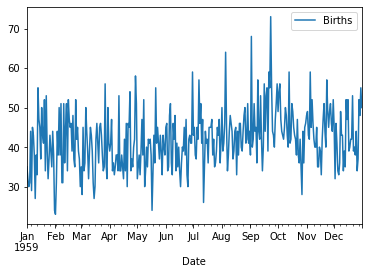

In [13]:
df1.plot();

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

from pylab import rcParams

rcParams['figure.figsize']=(12,6)

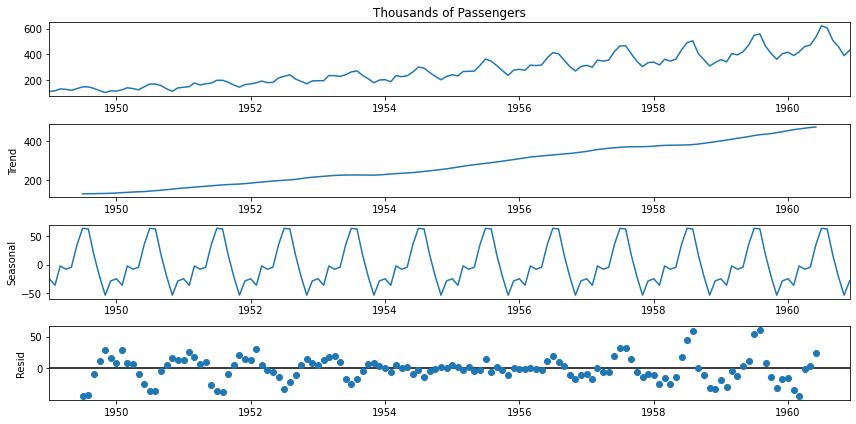

In [22]:
decomp=seasonal_decompose(df['Thousands of Passengers'],model='add')
decomp.plot();

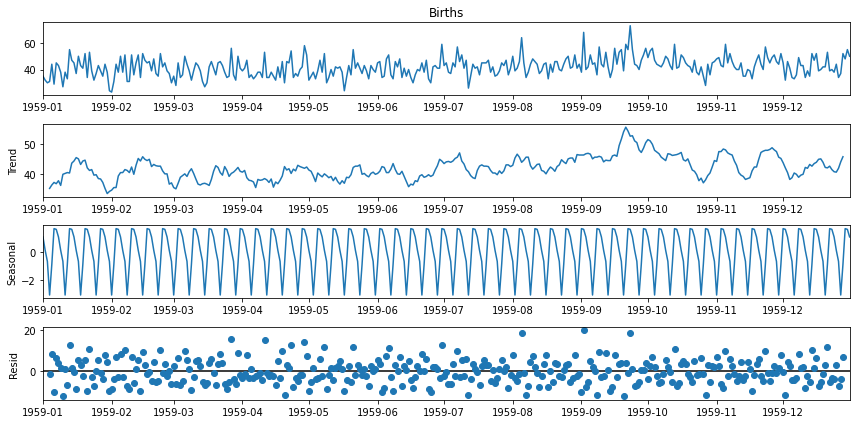

In [23]:
decomp_1=seasonal_decompose(df1['Births'],model='add')
decomp_1.plot();

In [24]:
from statsmodels.tsa.stattools import adfuller

In [25]:
adfuller(df['Thousands of Passengers'])

(0.8153688792060456,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [26]:
help(adfuller)

Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test.
    
    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.
    
    Parameters
    ----------
    x : array_like, 1d
        The data series to test.
    maxlag : int
        Maximum lag which is included in test, default 12*(nobs/100)^{1/4}.
    regression : {'c','ct','ctt','nc'}
        Constant and trend order to include in regression.
    
        * 'c' : constant only (default).
        * 'ct' : constant and trend.
        * 'ctt' : constant, and linear and quadratic trend.
        * 'nc' : no constant, no trend.
    
    autolag : {'AIC', 'BIC', 't-stat', None}
        Method to use when automatically determining the lag.
    
        * if None, then maxlag lags are used.
        * if 'AIC' (default) or 

In [27]:
dffuller=adfuller(df['Thousands of Passengers'])

In [30]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [31]:
adf_test(df['Thousands of Passengers'])

Augmented Dickey-Fuller Test: 
ADF test statistic        0.815369
p-value                   0.991880
# lags used              13.000000
# observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [32]:
adf_test(df1['Births'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -4.808291
p-value                   0.000052
# lags used               6.000000
# observations          358.000000
critical value (1%)      -3.448749
critical value (5%)      -2.869647
critical value (10%)     -2.571089
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [35]:
df2=pd.read_csv('C:/Users/anuj/Documents/Anuj/MMA/Udemy/Python/Time Series/UDEMY_TSA_FINAL/Data/samples.csv',index_col=0,parse_dates=True)

In [34]:
df2.head()

,Unnamed: 0,a,b,c,d
0,1/1/1950,36,27,0,67
1,2/1/1950,58,22,3,31
2,3/1/1950,61,17,5,67
3,4/1/1950,37,15,8,47
4,5/1/1950,66,13,8,62


In [36]:
df2.index.freq='MS'

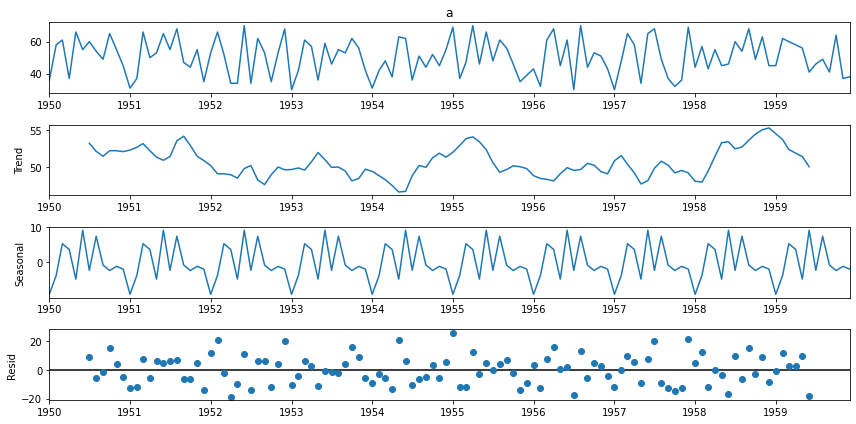

In [42]:
decomp_2_a=seasonal_decompose(df2['a'],model='add')
decomp_2_a.plot();

In [41]:
adf_test(df2['a'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -1.198852e+01
p-value                 3.566003e-22
# lags used             0.000000e+00
# observations          1.190000e+02
critical value (1%)    -3.486535e+00
critical value (5%)    -2.886151e+00
critical value (10%)   -2.579896e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


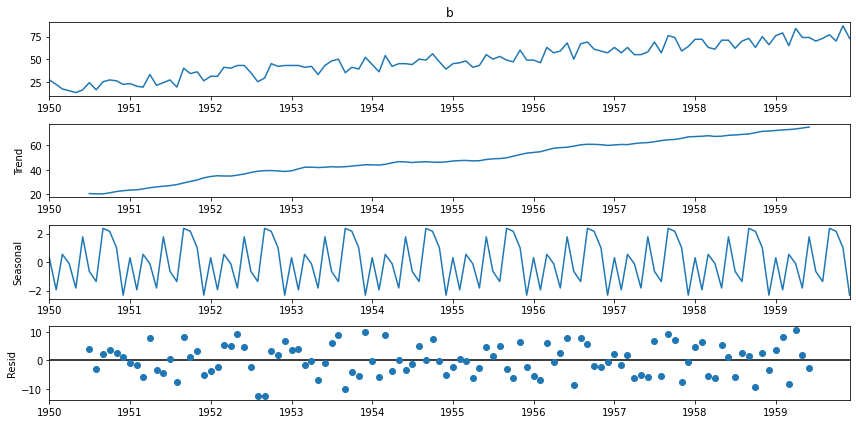

In [43]:
decomp_2_b=seasonal_decompose(df2['b'],model='add')
decomp_2_b.plot();

In [44]:
adf_test(df2['b'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -0.957987
p-value                   0.768278
# lags used               6.000000
# observations          113.000000
critical value (1%)      -3.489590
critical value (5%)      -2.887477
critical value (10%)     -2.580604
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


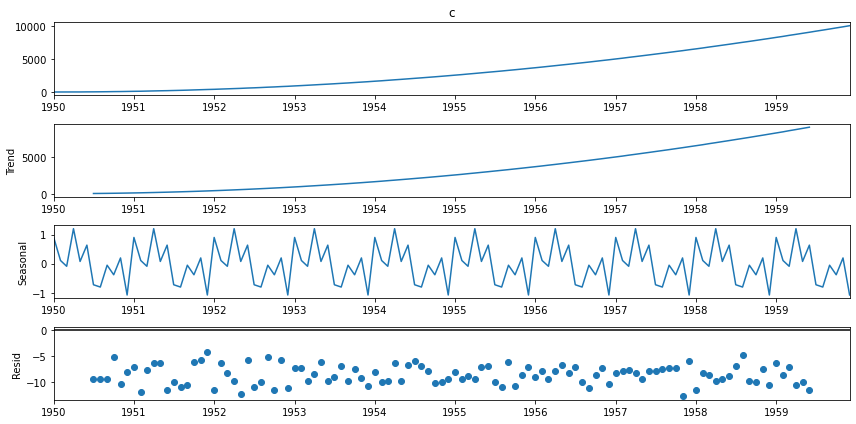

In [45]:
decomp_2_c=seasonal_decompose(df2['c'],model='add')
decomp_2_c.plot();

In [46]:
adf_test(df2['c'])

Augmented Dickey-Fuller Test: 
ADF test statistic        0.198893
p-value                   0.972199
# lags used              12.000000
# observations          107.000000
critical value (1%)      -3.492996
critical value (5%)      -2.888955
critical value (10%)     -2.581393
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


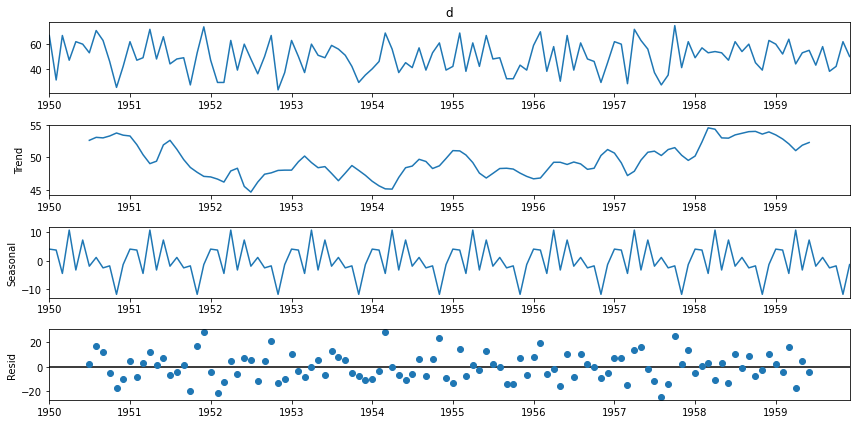

In [47]:
decomp_2_d=seasonal_decompose(df2['d'],model='add')
decomp_2_d.plot();

In [48]:
adf_test(df2['d'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -1.206409e+01
p-value                 2.431376e-22
# lags used             0.000000e+00
# observations          1.190000e+02
critical value (1%)    -3.486535e+00
critical value (5%)    -2.886151e+00
critical value (10%)   -2.579896e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary
